In [51]:
import pandas as pd
import plotly.express as px
import numpy as np

In [52]:
import os; os.getcwd()
df = pd.read_parquet("../data/processed/outlier_removed.parquet")

'/home/mert/Desktop/thesis/notebooks'

In [54]:
corr = pd.pivot_table(
    df[df["forecast_dt"] < "2021-01-01"][["rt_plant_id", "production", "forecast_dt"]],
    index="forecast_dt", columns="rt_plant_id", values="production").corr()

In [55]:
plants = [1472,  1944,  2374,  1929, 1900, 2184, 2089, 2113, 1459, 2031, 2224, 1460, 2288, 1977, 1959, 1502, 1494, 2058, 1499, 1485, 1505, 1501, 2050, 2063, 1899, 2083, 2112,
          2073, 1759, 2116, 2062, 2070, 2040, 968, 2125, 1737, 2323, 2123, 2180, 969, 1527, 1528, 1525, 1709, 1741, 1523, 1484, 1504, 1506, 2140, 1514, 1509, 1518, 1511, 1761,
          1883, 1507, 757, 1512, 1928, 1498, 1488, 1781, 2166, 1843, 1487, 1489, 1493, 1490, 1878, 1508, 672, 1516, 1519, 1537, 1517, 2114, 2291, 1492, 1491, 1503, 1194, 1945,
          1655, 1513, 1524, 1943, 1578, 2326, 1939]

In [56]:
corr.loc[plants, plants].iloc[:5, :5]

rt_plant_id,1472,1944,2374,1929,1900
rt_plant_id,,,,,
1472,1.000000,0.877437,0.732947,0.464612,0.560153
1944,0.877437,1.000000,0.789351,0.592853,0.666993
2374,0.732947,0.789351,1.000000,0.690944,0.630564
1929,0.464612,0.592853,0.690944,1.000000,0.682434
1900,0.560153,0.666993,0.630564,0.682434,1.000000


In [57]:
corr.iloc[:5, :5]

rt_plant_id,672,757,968,969,1194
rt_plant_id,,,,,
672,1.000000,0.814705,0.574410,0.717079,0.721954
757,0.814705,1.000000,0.637304,0.743814,0.682445
968,0.574410,0.637304,1.000000,0.752258,0.516752
969,0.717079,0.743814,0.752258,1.000000,0.565042
1194,0.721954,0.682445,0.516752,0.565042,1.000000


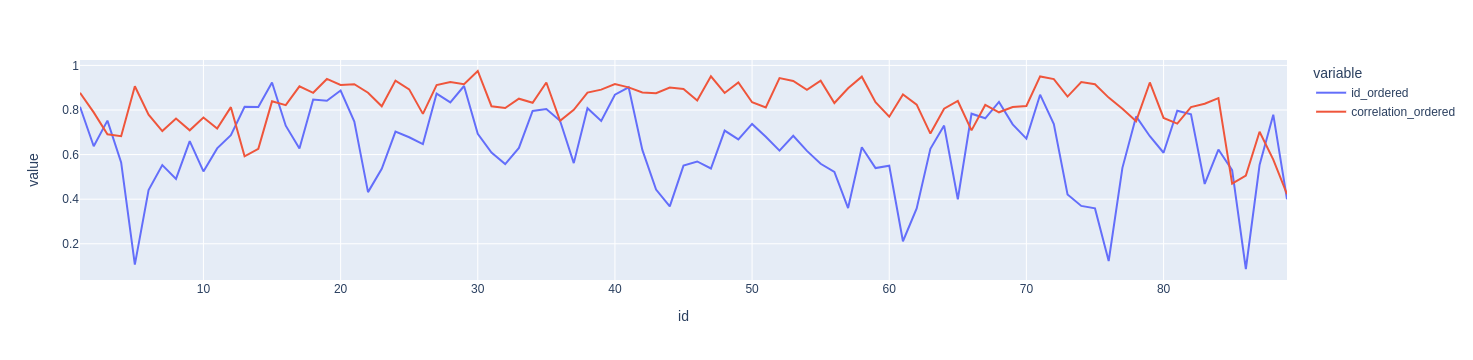

In [50]:
df = pd.DataFrame(dict(
    id_ordered = [corr.iloc[i,i+1] for i in range(len(corr)-1)],
    correlation_ordered = [corr.loc[plants, plants].iloc[i,i+1] for i in range(len(corr)-1)]
))
df["id"] = range(len(df))
df["id"] += 1

fig = px.line(pd.melt(df, id_vars="id"), x="id", y="value", color='variable')
fig.show()

In [60]:
print(np.mean([corr.iloc[i,i+1] for i in range(len(corr)-1)]))
print(np.mean([corr.loc[plants, plants].iloc[i,i+1] for i in range(len(corr)-1)]))

0.6293355488185121
0.8245109654419306


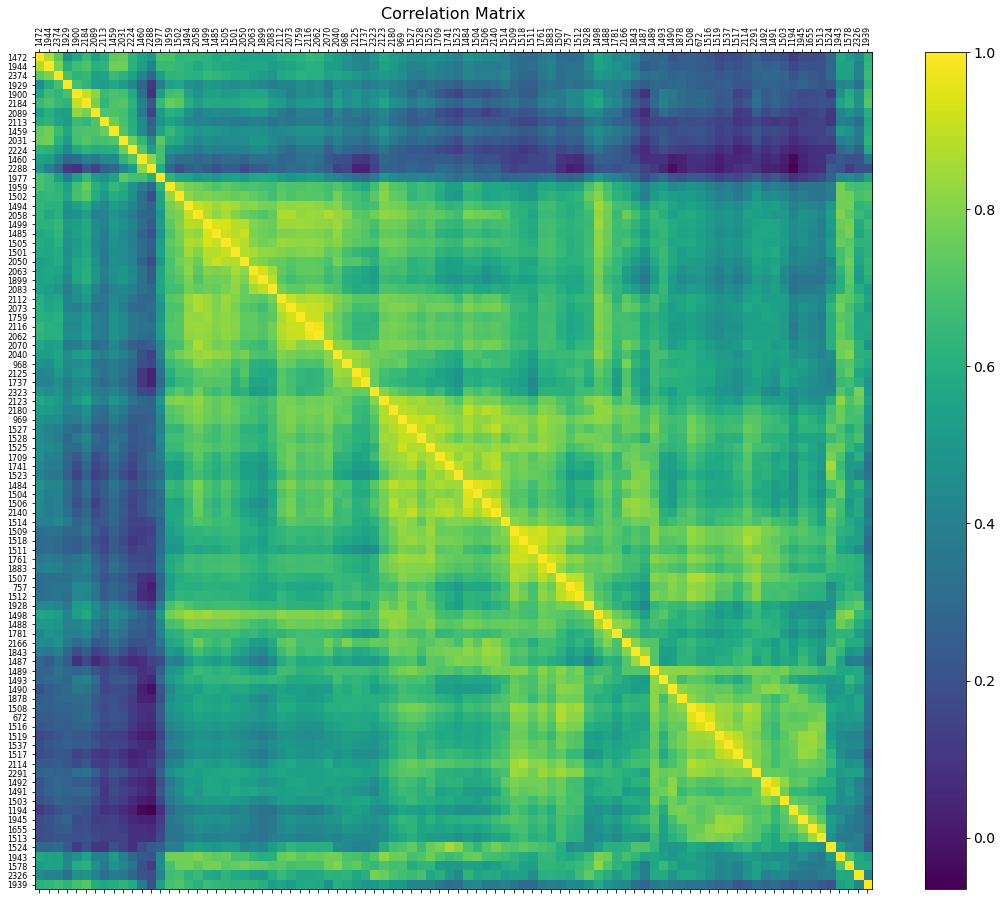

In [71]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr.loc[plants, plants], fignum=f.number)
plt.xticks(range(corr.loc[plants, plants].select_dtypes(['number']).shape[1]), corr.loc[plants, plants].select_dtypes(['number']).columns, fontsize=8, rotation=90)
plt.yticks(range(corr.loc[plants, plants].select_dtypes(['number']).shape[1]), corr.loc[plants, plants].select_dtypes(['number']).columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

plt.savefig('corr_ordered.png')

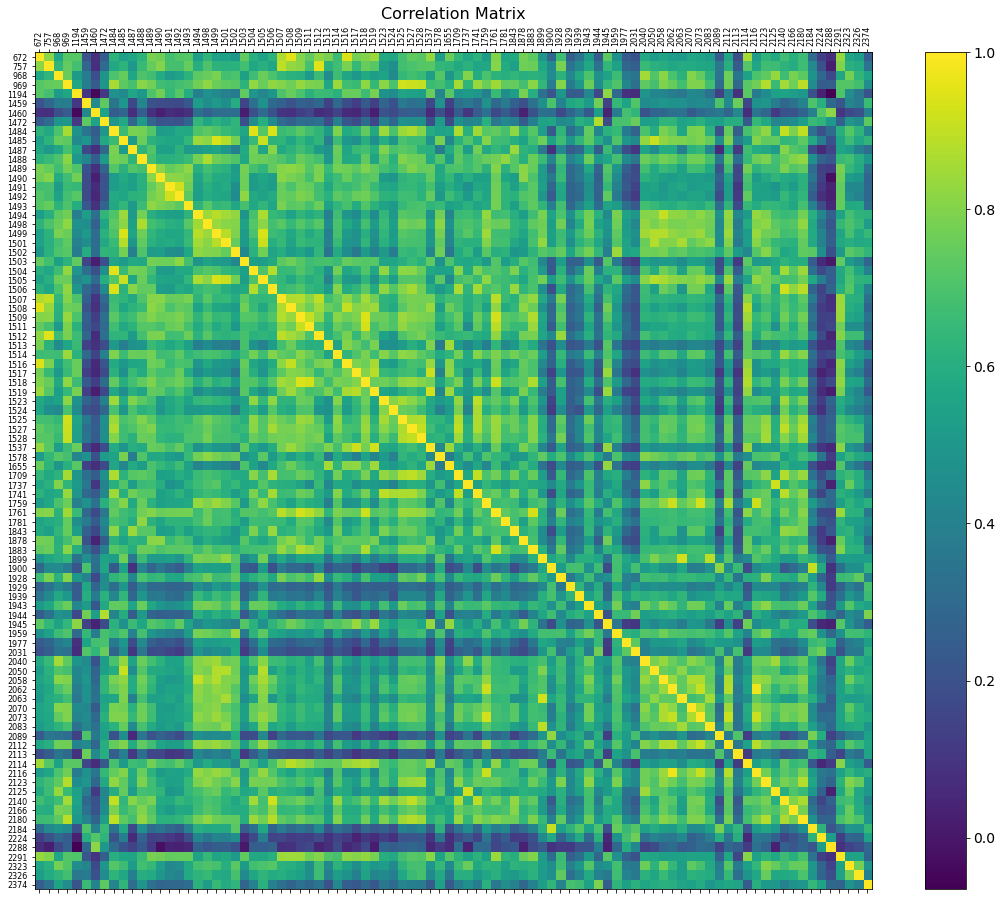

In [72]:
f = plt.figure(figsize=(19, 15))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(corr.select_dtypes(['number']).shape[1]), corr.select_dtypes(['number']).columns, fontsize=8, rotation=90)
plt.yticks(range(corr.select_dtypes(['number']).shape[1]), corr.select_dtypes(['number']).columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

plt.savefig('random_id_ordered.png')
